In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import pandas_profiling as pp
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from sklearn.preprocessing import StandardScaler
from matplotlib.text import Text
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import squarify
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter

In [3]:
df = pd.read_csv(r"../DWDM_Active_Learning/netflix_titles.csv")

In [ ]:
data = df.copy()

In [171]:
df.shape

(6234, 13)

In [172]:
print("NUMBER OF ROWS:", df.shape[0])
print("NUMBER OF COLUMNS", df.shape[1])

NUMBER OF ROWS: 6234
NUMBER OF COLUMNS 13


In [4]:
df.head()

show_id     type                                    title  \
0  81145628    Movie  Norm of the North: King Sized Adventure   
1  80117401    Movie               Jandino: Whatever it Takes   
2  70234439  TV Show                       Transformers Prime   
3  80058654  TV Show         Transformers: Robots in Disguise   
4  80125979    Movie                             #realityhigh   

                   director  \
0  Richard Finn, Tim Maltby   
1                       NaN   
2                       NaN   
3                       NaN   
4          Fernando Lebrija   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Peter Cullen, Sumalee Montano, Frank Welker, J...   
3  Will Friedle, Darren Criss, Constance Zimmer, ...   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2018          2013   
3                             United States  September 8, 2018          2016   
4                             United States  September 8, 2017          2017   

     rating  duration                           listed_in  \
0     TV-PG    90 min  Children & Family Movies, Comedies   
1     TV-MA    94 min                     Stand-Up Comedy   
2  TV-Y7-FV  1 Season                            Kids' TV   
3     TV-Y7  1 Season                            Kids' TV   
4     TV-14    99 min                            Comedies   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  With the help of three human allies, the Autob...  
3  When a prison ship crash unleashes hundreds of...  
4  When nerdy high schooler Dani finally attracts...

In [5]:
df.describe(include = 'all')

show_id   type title                director                cast  \
count   6.234000e+03   6234  6234                    4265                5664   
unique           NaN      2  6172                    3301                5469   
top              NaN  Movie  Love  Raúl Campos, Jan Suter  David Attenborough   
freq             NaN   4265     3                      18                  18   
mean    7.670368e+07    NaN   NaN                     NaN                 NaN   
std     1.094296e+07    NaN   NaN                     NaN                 NaN   
min     2.477470e+05    NaN   NaN                     NaN                 NaN   
25%     8.003580e+07    NaN   NaN                     NaN                 NaN   
50%     8.016337e+07    NaN   NaN                     NaN                 NaN   
75%     8.024489e+07    NaN   NaN                     NaN                 NaN   
max     8.123573e+07    NaN   NaN                     NaN                 NaN   

              country       date_added  release_year rating  duration  \
count            5758             6223    6234.00000   6224      6234   
unique            554             1524           NaN     14       201   
top     United States  January 1, 2020           NaN  TV-MA  1 Season   
freq             2032              122           NaN   2027      1321   
mean              NaN              NaN    2013.35932    NaN       NaN   
std               NaN              NaN       8.81162    NaN       NaN   
min               NaN              NaN    1925.00000    NaN       NaN   
25%               NaN              NaN    2013.00000    NaN       NaN   
50%               NaN              NaN    2016.00000    NaN       NaN   
75%               NaN              NaN    2018.00000    NaN       NaN   
max               NaN              NaN    2020.00000    NaN       NaN   

            listed_in                                        description  
count            6234                                               6234  
unique            461                                               6226  
top     Documentaries  A surly septuagenarian gets another chance at ...  
freq              299                                                  3  
mean              NaN                                                NaN  
std               NaN                                                NaN  
min               NaN                                                NaN  
25%               NaN                                                NaN  
50%               NaN                                                NaN  
75%               NaN                                                NaN  
max               NaN                                                NaN

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
df = df.rename(columns = {"listed_in" : "genre"})

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
genre              0
description        0
dtype: int64

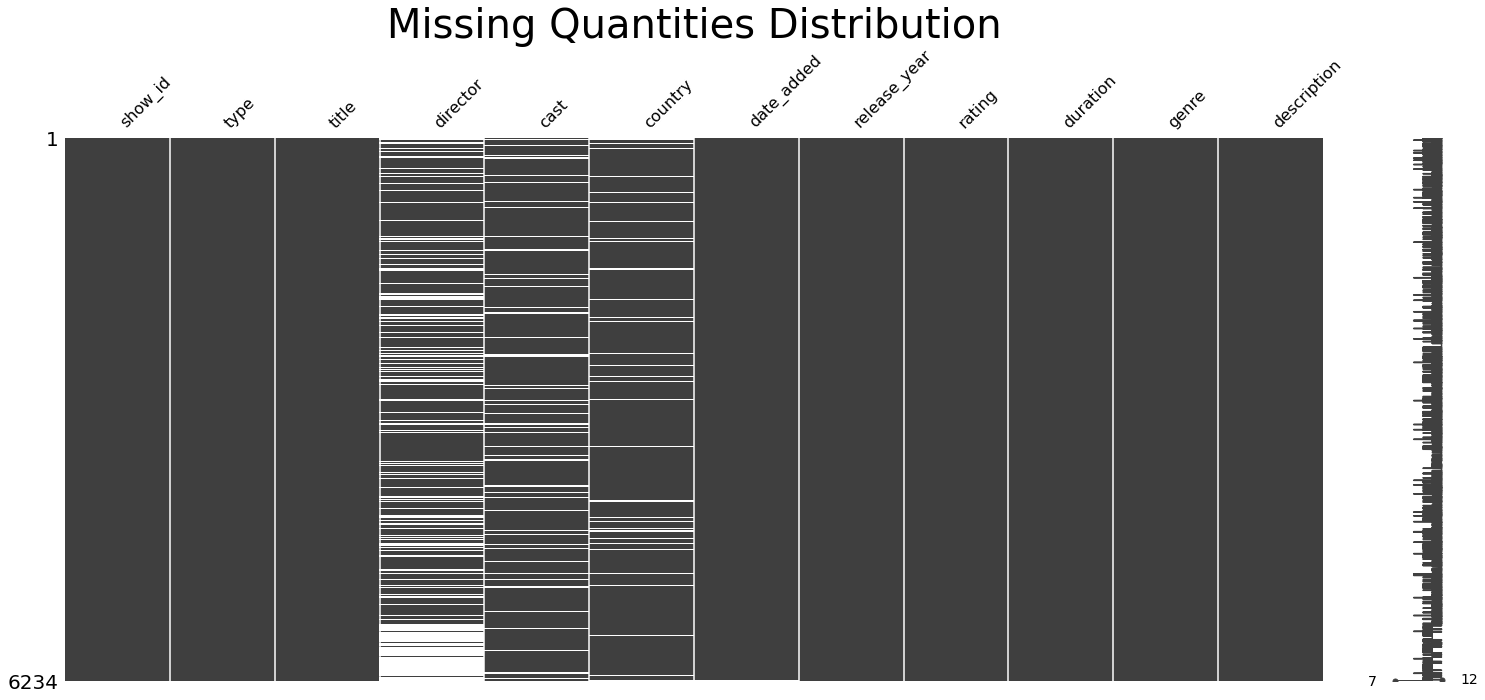

In [9]:
msno.matrix(df)
plt.title("Missing Quantities Distribution", fontsize=40)
plt.show()

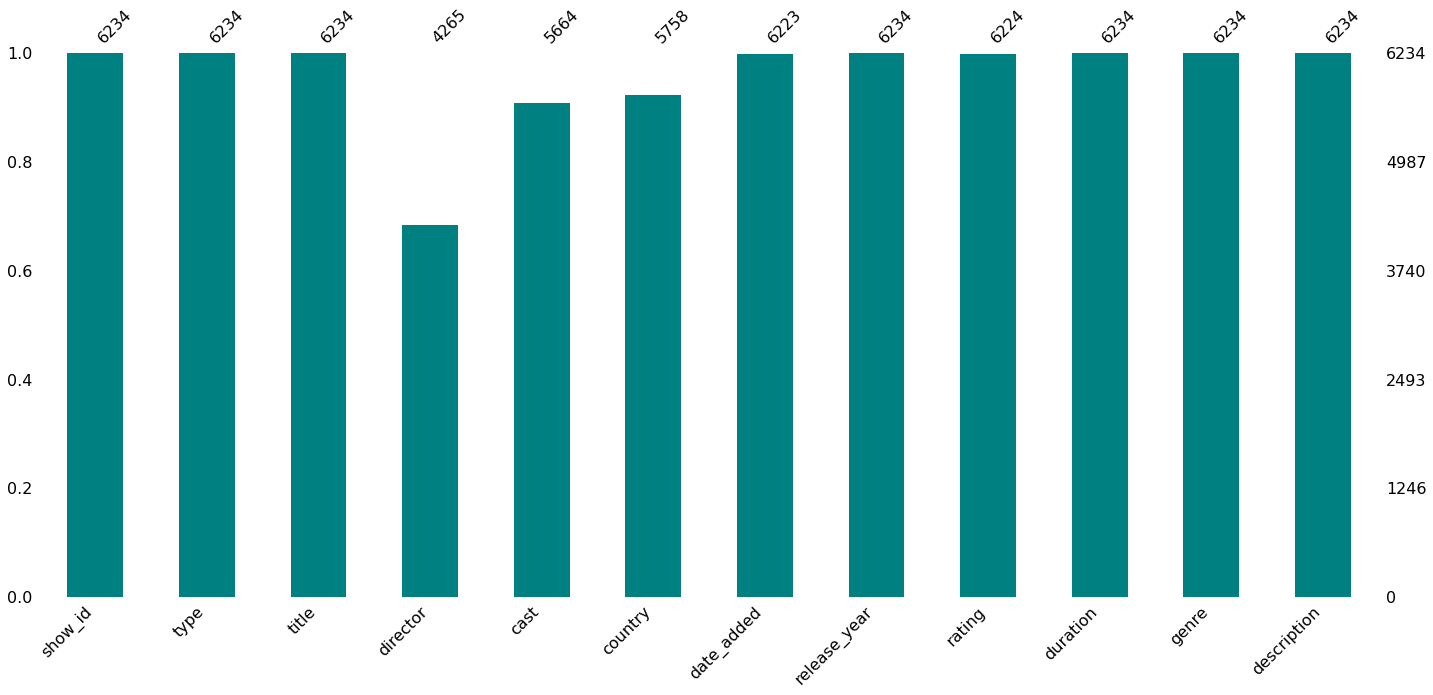

In [10]:
n = msno.bar(df,color='teal')

**Our Goal is to Build A Recommender System** In this notebook we will perform Exploratory Data Anaylysis on the data to help recommend users the best shows and movies
Analysis:  
1. [Type of Show](#type)
2. [Rating](#rating)
3. [Year Released](#year_released)
4. [Country](#country)
5. [Titles](#title)
6. [Genre](#genre)
7. [Director](#director)
8. [Actors](#actors)

<a id = 'type'></a>
### <font color = orange> 1. Types of Shows
</font>

/Users/sudhirshinde/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



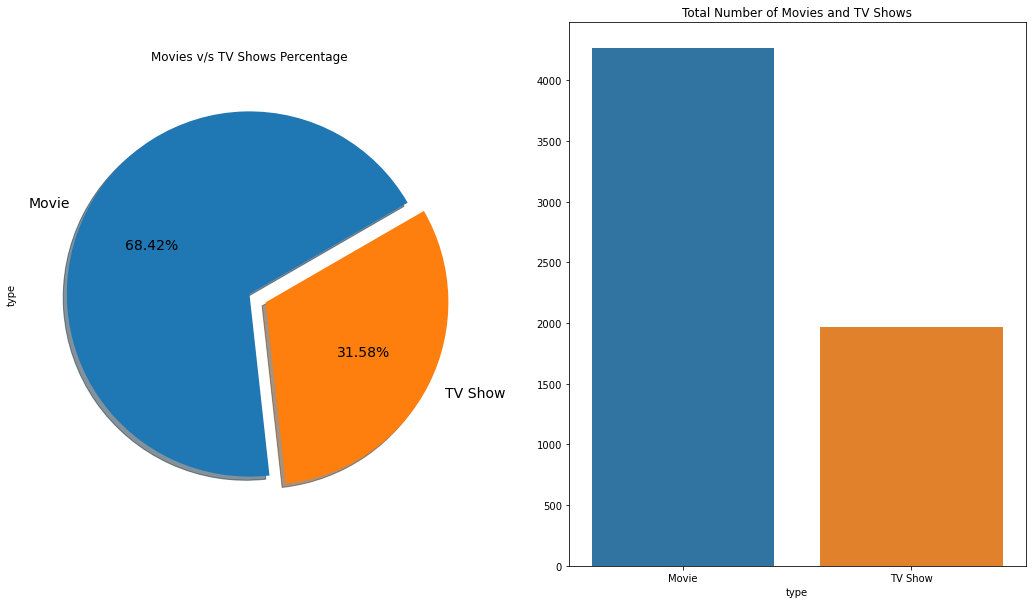

In [11]:
fig, ax = plt.subplots(1,2,figsize=(18,10))
(df['type'].value_counts(normalize=True)*100).plot.pie(explode=[0,0.1], ax=ax[0], autopct='%1.2f%%', shadow=True, 
                                    fontsize=14, startangle=30)
ax[0].set_title('Movies v/s TV Shows Percentage')


sns.countplot('type', data=df, ax= ax[1])
ax[1].set_title('Total Number of Movies and TV Shows')
ax[1].set_ylabel(' ')

plt.show()



Creating a separate database for movies and a separate database for TV Shows for better analysis

In [12]:
movies = df[df['type']=='Movie']
shows = df[df['type']=='TV Show']

movies.head()

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
4  80125979  Movie                             #realityhigh   
6  70304989  Movie                                 Automata   
7  80164077  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
4                 Fernando Lebrija   
6                      Gabe Ibáñez   
7  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
4  Nesta Cooper, Kate Walsh, John Michael Higgins...   
6  Antonio Banderas, Dylan McDermott, Melanie Gri...   
7                                    Fabrizio Copano   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
4                             United States  September 8, 2017          2017   
6    Bulgaria, United States, Spain, Canada  September 8, 2017          2014   
7                                     Chile  September 8, 2017          2017   

  rating duration                                              genre  \
0  TV-PG   90 min                 Children & Family Movies, Comedies   
1  TV-MA   94 min                                    Stand-Up Comedy   
4  TV-14   99 min                                           Comedies   
6      R  110 min  International Movies, Sci-Fi & Fantasy, Thrillers   
7  TV-MA   60 min                                    Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
4  When nerdy high schooler Dani finally attracts...  
6  In a dystopian future, an insurance adjuster f...  
7  Fabrizio Copano takes audience participation t...

In [13]:
shows.head()

show_id     type                             title director  \
2   70234439  TV Show                Transformers Prime      NaN   
3   80058654  TV Show  Transformers: Robots in Disguise      NaN   
5   80163890  TV Show                           Apaches      NaN   
8   80117902  TV Show                      Fire Chasers      NaN   
26  80244601  TV Show                   Castle of Stars      NaN   

                                                 cast        country  \
2   Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
3   Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
5   Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
8                                                 NaN  United States   
26  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...            NaN   

           date_added  release_year    rating  duration  \
2   September 8, 2018          2013  TV-Y7-FV  1 Season   
3   September 8, 2018          2016     TV-Y7  1 Season   
5   September 8, 2017          2016     TV-MA  1 Season   
8   September 8, 2017          2017     TV-MA  1 Season   
26  September 7, 2018          2015     TV-14  1 Season   

                                                genre  \
2                                            Kids' TV   
3                                            Kids' TV   
5   Crime TV Shows, International TV Shows, Spanis...   
8                     Docuseries, Science & Nature TV   
26  International TV Shows, Romantic TV Shows, TV ...   

                                          description  
2   With the help of three human allies, the Autob...  
3   When a prison ship crash unleashes hundreds of...  
5   A young journalist is forced into a life of cr...  
8   As California's 2016 fire season rages, brave ...  
26  As four couples with different lifestyles go t...

In [14]:
movies.reset_index(inplace = True, drop = True)
movies.head(5)

show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   
1  80117401  Movie               Jandino: Whatever it Takes   
2  80125979  Movie                             #realityhigh   
3  70304989  Movie                                 Automata   
4  80164077  Movie       Fabrizio Copano: Solo pienso en mi   

                          director  \
0         Richard Finn, Tim Maltby   
1                              NaN   
2                 Fernando Lebrija   
3                      Gabe Ibáñez   
4  Rodrigo Toro, Francisco Schultz   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   
1                                   Jandino Asporaat   
2  Nesta Cooper, Kate Walsh, John Michael Higgins...   
3  Antonio Banderas, Dylan McDermott, Melanie Gri...   
4                                    Fabrizio Copano   

                                    country         date_added  release_year  \
0  United States, India, South Korea, China  September 9, 2019          2019   
1                            United Kingdom  September 9, 2016          2016   
2                             United States  September 8, 2017          2017   
3    Bulgaria, United States, Spain, Canada  September 8, 2017          2014   
4                                     Chile  September 8, 2017          2017   

  rating duration                                              genre  \
0  TV-PG   90 min                 Children & Family Movies, Comedies   
1  TV-MA   94 min                                    Stand-Up Comedy   
2  TV-14   99 min                                           Comedies   
3      R  110 min  International Movies, Sci-Fi & Fantasy, Thrillers   
4  TV-MA   60 min                                    Stand-Up Comedy   

                                         description  
0  Before planning an awesome wedding for his gra...  
1  Jandino Asporaat riffs on the challenges of ra...  
2  When nerdy high schooler Dani finally attracts...  
3  In a dystopian future, an insurance adjuster f...  
4  Fabrizio Copano takes audience participation t...

In [15]:
shows.reset_index(drop = True, inplace = True)
shows.head(5)

show_id     type                             title director  \
0  70234439  TV Show                Transformers Prime      NaN   
1  80058654  TV Show  Transformers: Robots in Disguise      NaN   
2  80163890  TV Show                           Apaches      NaN   
3  80117902  TV Show                      Fire Chasers      NaN   
4  80244601  TV Show                   Castle of Stars      NaN   

                                                cast        country  \
0  Peter Cullen, Sumalee Montano, Frank Welker, J...  United States   
1  Will Friedle, Darren Criss, Constance Zimmer, ...  United States   
2  Alberto Ammann, Eloy Azorín, Verónica Echegui,...          Spain   
3                                                NaN  United States   
4  Chaiyapol Pupart, Jintanutda Lummakanon, Worra...            NaN   

          date_added  release_year    rating  duration  \
0  September 8, 2018          2013  TV-Y7-FV  1 Season   
1  September 8, 2018          2016     TV-Y7  1 Season   
2  September 8, 2017          2016     TV-MA  1 Season   
3  September 8, 2017          2017     TV-MA  1 Season   
4  September 7, 2018          2015     TV-14  1 Season   

                                               genre  \
0                                           Kids' TV   
1                                           Kids' TV   
2  Crime TV Shows, International TV Shows, Spanis...   
3                    Docuseries, Science & Nature TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  With the help of three human allies, the Autob...  
1  When a prison ship crash unleashes hundreds of...  
2  A young journalist is forced into a life of cr...  
3  As California's 2016 fire season rages, brave ...  
4  As four couples with different lifestyles go t...

<a id = 'rating'></a>
### <font color = orange> 2. Ratings
</font>

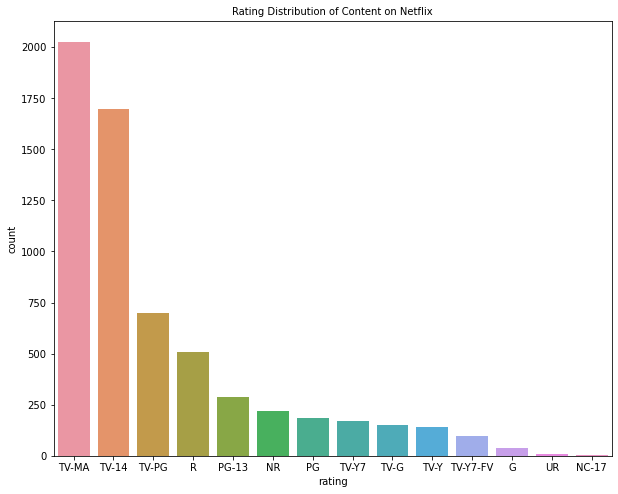

In [16]:
plt.figure(figsize=(10,8))
plt.title("Rating Distribution of Content on Netflix", fontsize=10)
sns.countplot(x = "rating", data = df, order = df['rating'].value_counts().index[0:14])

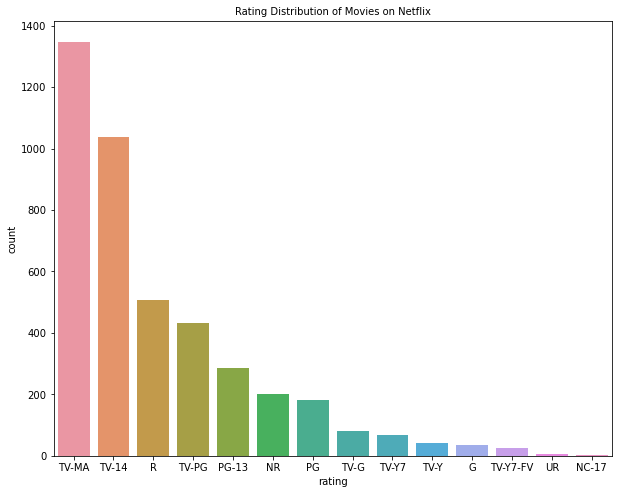

In [17]:
plt.figure(figsize=(10,8))
plt.title("Rating Distribution of Movies on Netflix", fontsize=10)
sns.countplot(x = "rating", data = movies, order = movies['rating'].value_counts().index[0:14])

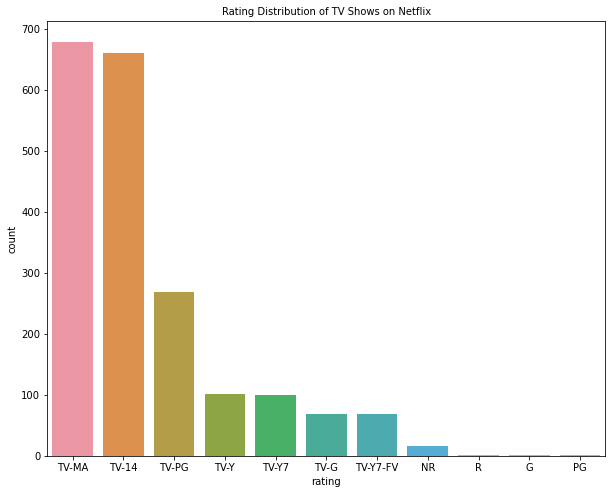

In [18]:
plt.figure(figsize=(10,8))
plt.title("Rating Distribution of TV Shows on Netflix", fontsize=10)
sns.countplot(x = "rating", data = shows, order = shows['rating'].value_counts().index[0:14])

# Percentage distrubtion of Rating:

In [19]:
fig = px.pie(df,values = df['rating'].value_counts()[:10],names = df['rating'].value_counts()[:10].index,labels= df['rating'].value_counts()[:10].index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.update_layout(title='Rating Distribution of Content on Netflix', title_x=0.5)
fig.show()

In [20]:
fig = px.pie(movies,values = movies['rating'].value_counts()[:10],names = movies['rating'].value_counts()[:10].index,labels= movies['rating'].value_counts()[:10].index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.update_layout(title='Rating Distribution of Movies on Netflix', title_x=0.5)
fig.show()

In [21]:
fig = px.pie(shows,values = shows['rating'].value_counts()[:10],names = shows['rating'].value_counts()[:10].index,labels= shows['rating'].value_counts()[:10].index)
fig.update_traces(textposition ='inside',textinfo='percent+label')
fig.update_layout(title='Rating Distribution of Shows on Netflix', title_x=0.5)
fig.show()

In [22]:
movies_rating = movies['rating'].value_counts().reset_index()
shows_rating = shows['rating'].value_counts().reset_index()

trace1 = go.Bar(x = movies_rating['index'],
                y = movies_rating['rating'],
                name = "Movies",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

trace2 = go.Bar(x = shows_rating['index'],
                y = shows_rating['rating'],
                name = "TV Shows",
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

layout = go.Layout(template='plotly_dark', title='Rating by Content Type', xaxis=dict(title='Rating'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

<a id = 'year_released'></a>
### <font color = orange> 3. Year Released
</font>

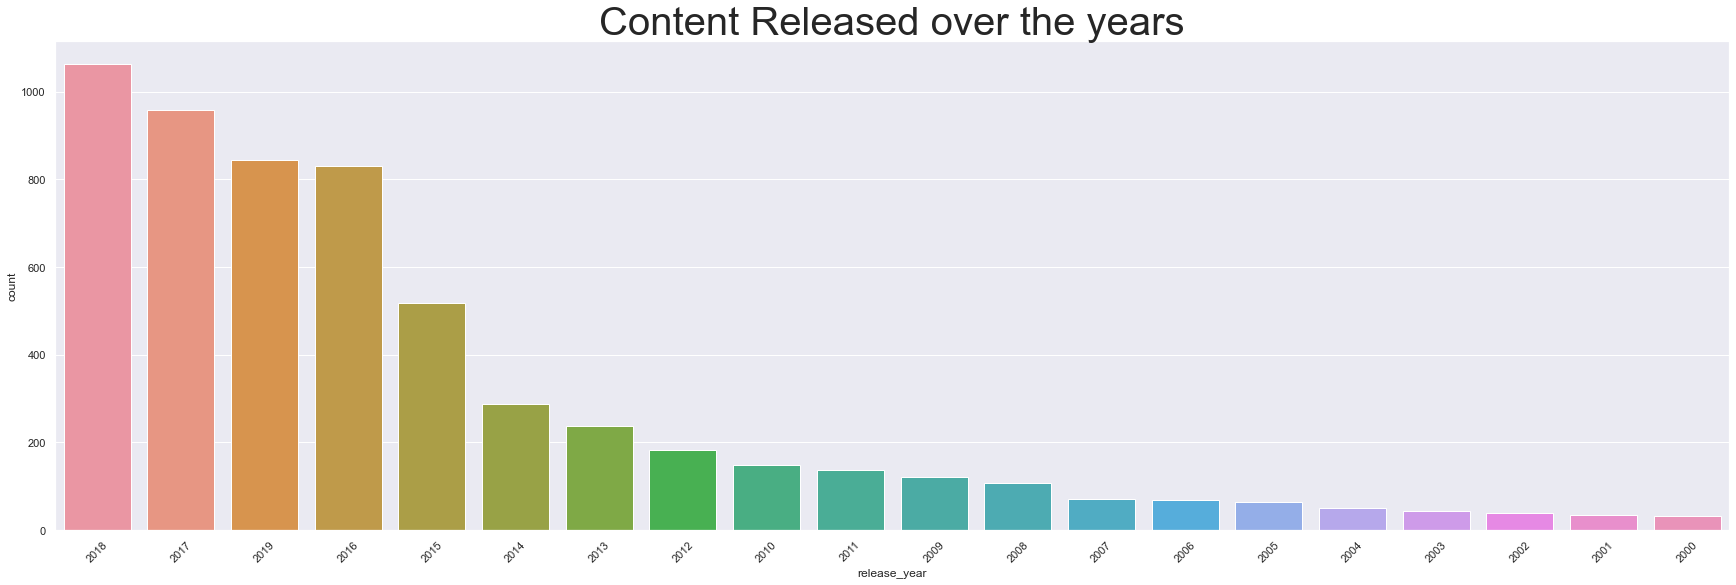

In [23]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= df,order = df['release_year'].value_counts().index[0:20])
plt.title("Content Released over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

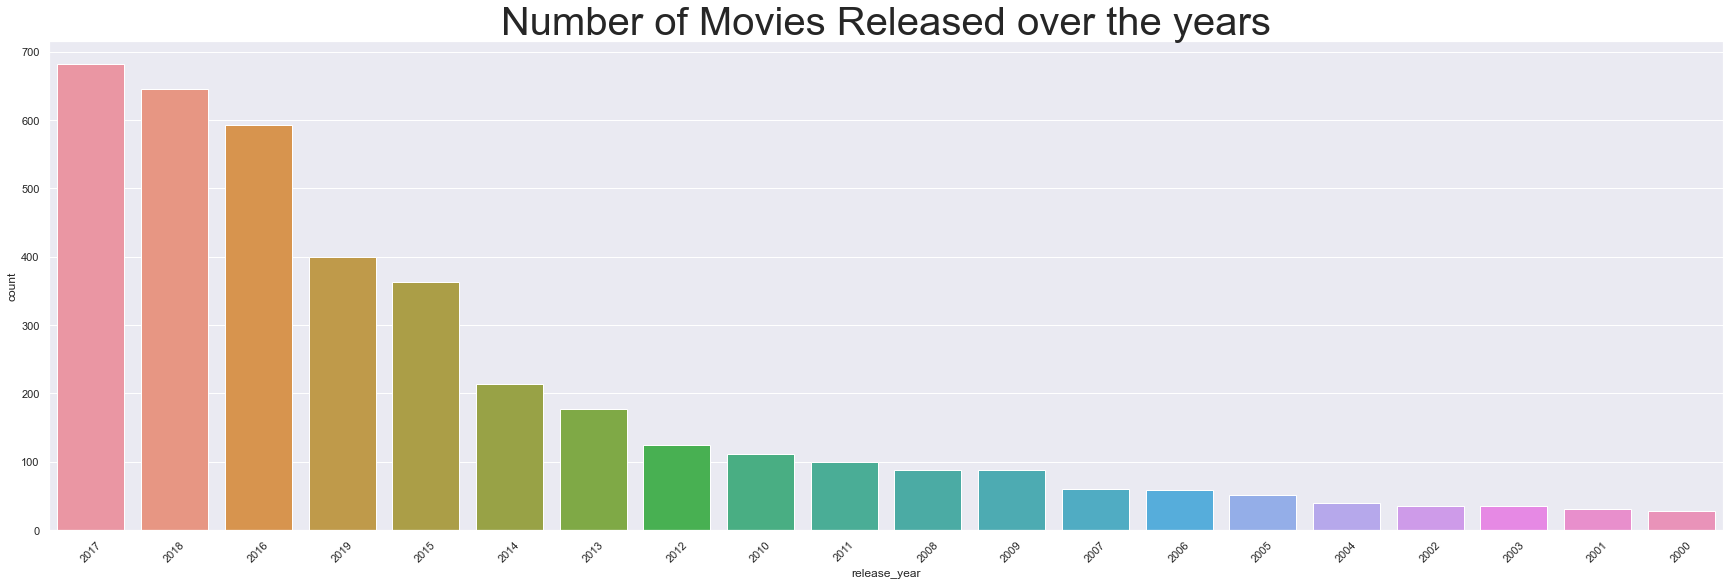

In [24]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= movies,order = movies['release_year'].value_counts().index[0:20])
plt.title("Number of Movies Released over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

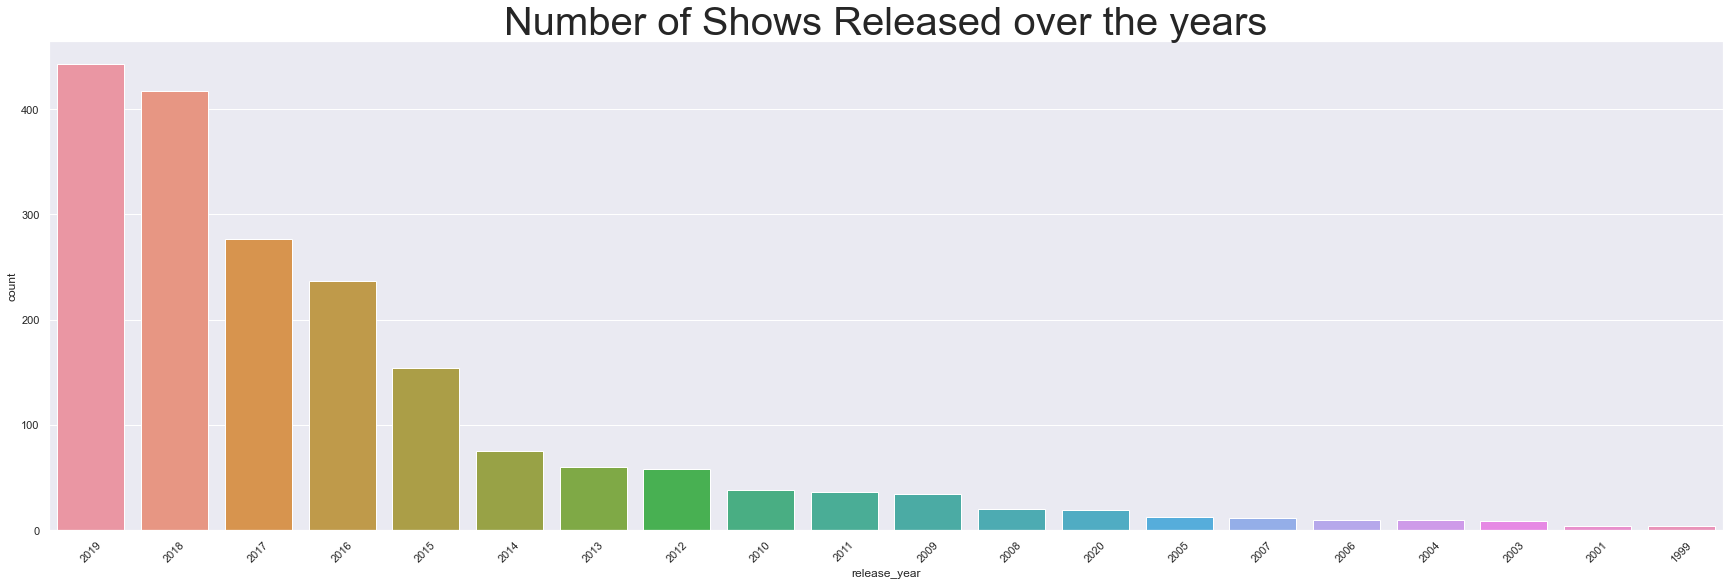

In [25]:
sns.set()
plt.figure(figsize=(30,9))
sns.countplot(x="release_year",data= shows,order = shows['release_year'].value_counts().index[0:20])
plt.title("Number of Shows Released over the years", fontsize=40)
plt.xticks(rotation=45)
plt.show()

In [26]:
movies_release = movies['release_year'].value_counts().reset_index()
shows_release = shows['release_year'].value_counts().reset_index()

trace1 = go.Bar(x = movies_release['index'],
                y = movies_release['release_year'],
                name = "Movies",
                marker = dict(color = 'rgb(249, 6, 6)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

trace2 = go.Bar(x = shows_release['index'],
                y = shows_release['release_year'],
                name = "TV Shows",
                marker = dict(color = 'rgb(26, 118, 255)',
                             line = dict(color='rgb(0, 0, 0)', width=1.5))
               )

layout = go.Layout(template='plotly_dark', title='Release Years by Content Type', xaxis=dict(title='Years'), yaxis=dict(title='Count'))
fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

<a id = 'country'></a>
### <font color = orange> 4. Country Released
</font>

country
United States                    2032
India                             777
United Kingdom                    348
Japan                             176
Canada                            141
South Korea                       136
Spain                             117
France                             90
Mexico                             83
Turkey                             79
Australia                          71
Taiwan                             69
Hong Kong                          51
Brazil                             50
United Kingdom, United States      50
Name: show_id, dtype: int64

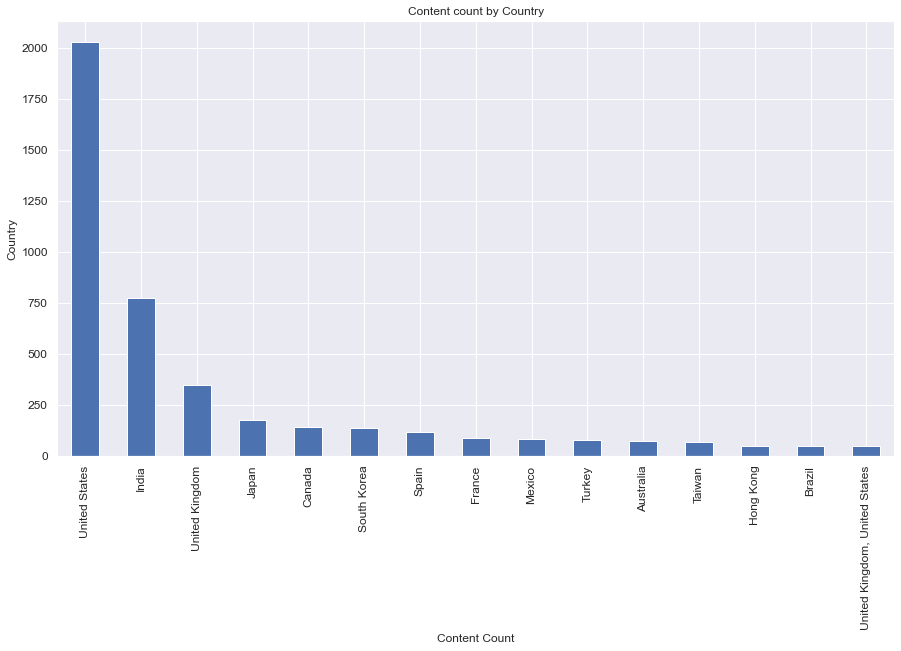

In [27]:
country=df.groupby('country')['show_id'].count().sort_values(ascending=False).head(15);
plt.subplots(figsize=(15,8));
country.plot(kind='bar',fontsize=12);
plt.xlabel('Content Count',fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Content count by Country',fontsize=12)
plt.ioff()
country

In [28]:
df['country'].isnull().sum()

476

In [29]:
df['country'] = df['country'].fillna(value = 'United States, India, United Kingdom')

In [30]:
nation = list(df['country'])
na = []

for i in nation:
    con = list(i.split(','))
    for j in con:
        na.append(j.replace(' ', ''))
na[:20]

['UnitedStates',
 'India',
 'SouthKorea',
 'China',
 'UnitedKingdom',
 'UnitedStates',
 'UnitedStates',
 'UnitedStates',
 'Spain',
 'Bulgaria',
 'UnitedStates',
 'Spain',
 'Canada',
 'Chile',
 'UnitedStates',
 'UnitedStates',
 'UnitedKingdom',
 'Denmark',
 'Sweden',
 'UnitedStates']

In [31]:
c = Counter(na)
c

Counter({'UnitedStates': 3086,
         'India': 1314,
         'SouthKorea': 162,
         'China': 120,
         'UnitedKingdom': 1078,
         'Spain': 178,
         'Bulgaria': 8,
         'Canada': 318,
         'Chile': 23,
         'Denmark': 38,
         'Sweden': 33,
         'Netherlands': 37,
         'Belgium': 66,
         'France': 271,
         'Uruguay': 9,
         '': 3,
         'Thailand': 56,
         'Pakistan': 23,
         'Turkey': 87,
         'Brazil': 66,
         'Italy': 67,
         'Indonesia': 52,
         'Ireland': 33,
         'HongKong': 97,
         'Morocco': 6,
         'Mexico': 129,
         'Vietnam': 4,
         'Argentina': 68,
         'Nigeria': 36,
         'Japan': 231,
         'Germany': 151,
         'Greece': 8,
         'Norway': 21,
         'Switzerland': 15,
         'UnitedArabEmirates': 21,
         'Lebanon': 9,
         'Cambodia': 3,
         'Russia': 21,
         'Poland': 27,
         'Israel': 26,
         'Australia': 

In [32]:
con = {}
for key, values in c.items():
    if values > 50:
        con[key] = values

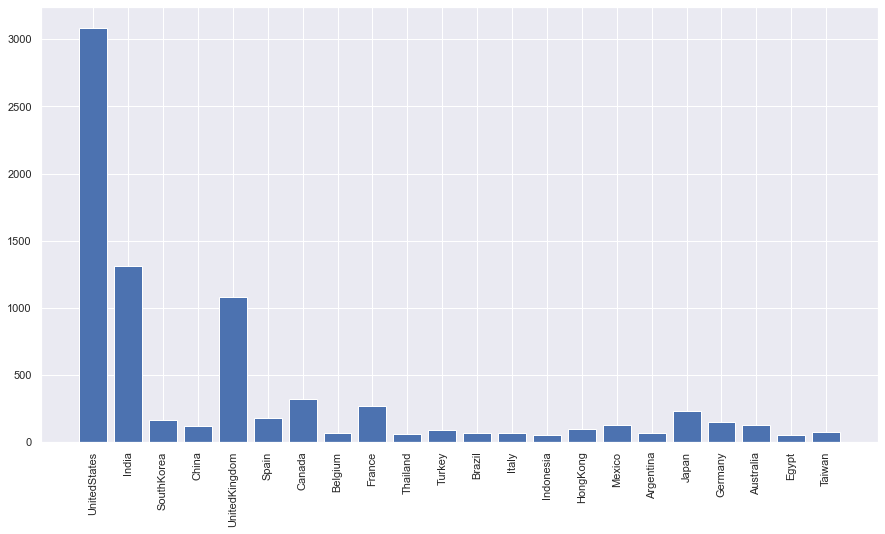

In [33]:
plt.subplots(figsize=(15,8));
plt.bar(range(len(con)), list(con.values()), align='center')
plt.xticks(range(len(con)), list(con.keys()), rotation = 90)
plt.show()

In [34]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

In [35]:
country = df.groupby('year_added')['country'].value_counts().reset_index(name='counts')
country.head()

year_added        country  counts
0      2008.0  United States       2
1      2009.0        Denmark       1
2      2009.0  United States       1
3      2010.0  United States       1
4      2011.0  United States      12

In [174]:
fig = px.choropleth(country, locations="country", color="counts", locationmode="country names", animation_frame="year_added", range_color=[0, 200], color_continuous_scale=px.colors.sequential.Bluered)
fig.update_layout(title="Comparison by Country")
fig.show()

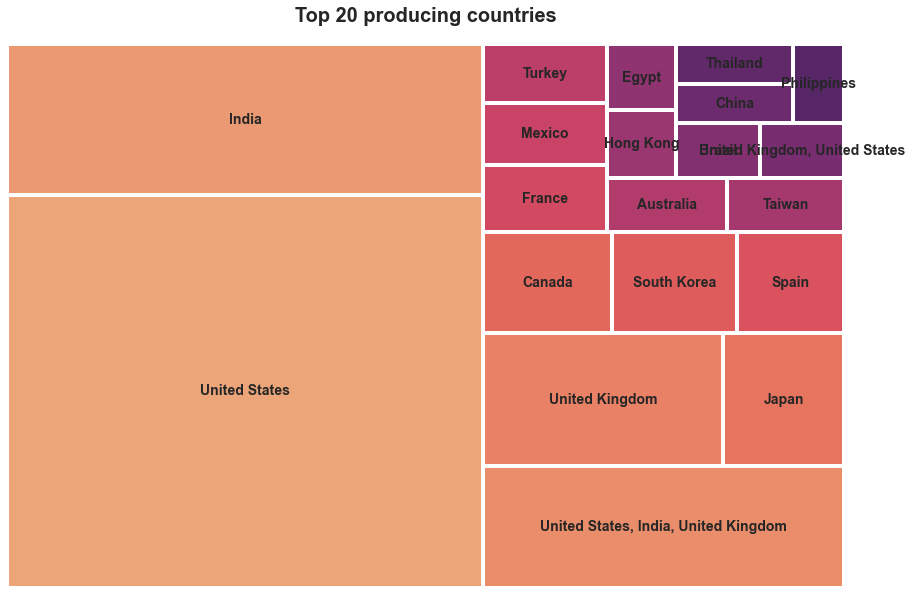

In [37]:
y = df['country'].value_counts()[:20]
fig = plt.figure(figsize=(15, 10))
squarify.plot(sizes = y.values, label = y.index, color = sns.color_palette("flare", n_colors = 20), 
              linewidth=4, text_kwargs={'fontsize':14, 'fontweight':'bold'})
plt.title('Top 20 producing countries', position=(0.5, 1.0+0.03), fontsize=20, fontweight='bold')
plt.axis('off')
plt.show()

<a id = 'title'></a>
### <font color = orange> 5. Title
</font>

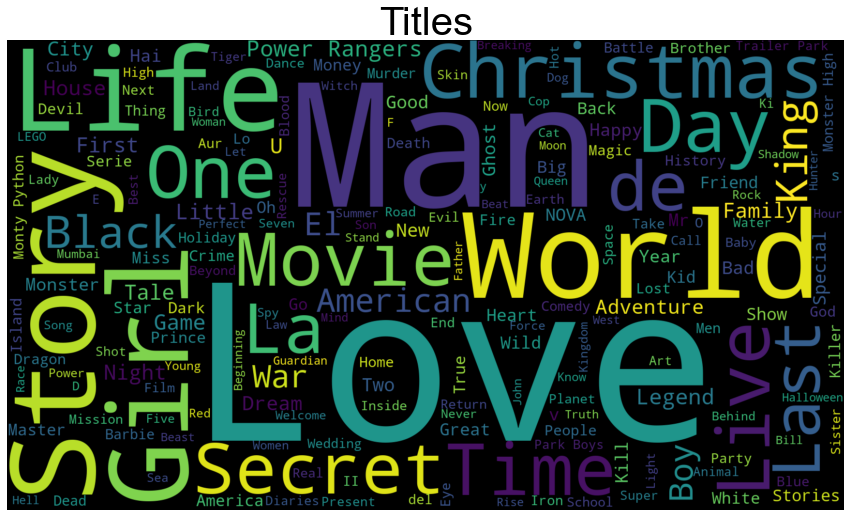

In [38]:
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(df.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("Titles", color="black", fontsize=40)
plt.figure(1,figsize=(12,12))
plt.show()

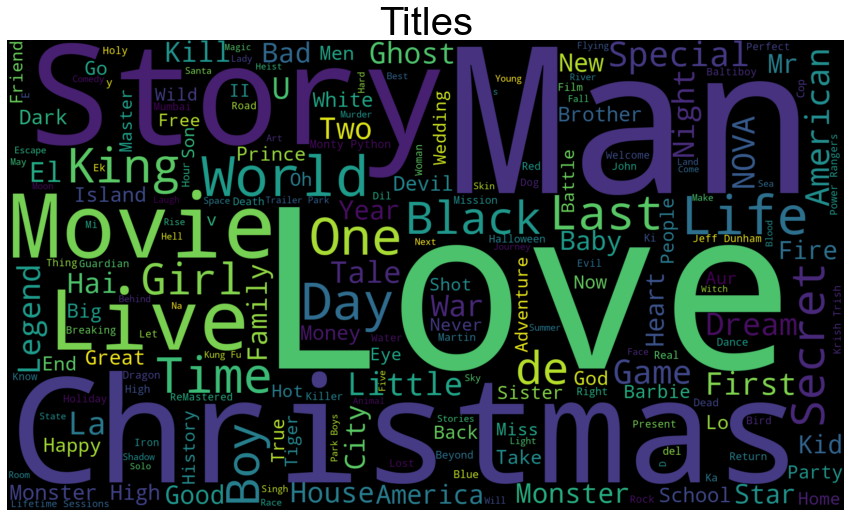

In [40]:
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(movies.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("Titles", color="black", fontsize=40)
plt.figure(1,figsize=(12,12))
plt.show()

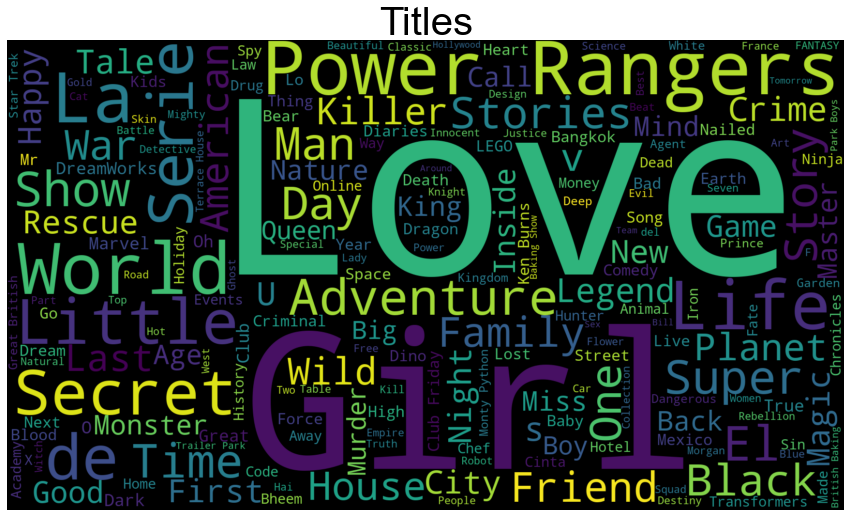

In [41]:
wordcloud = WordCloud(background_color = "black",width=1730,height=970).generate(" ".join(shows.title))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.title("Titles", color="black", fontsize=40)
plt.figure(1,figsize=(12,12))
plt.show()

<a id = 'genre'></a>
### <font color = orange> 6. Genre
</font>

In [44]:
df['genre'].value_counts()

Documentaries                                                   299
Stand-Up Comedy                                                 273
Dramas, International Movies                                    248
Dramas, Independent Movies, International Movies                186
Comedies, Dramas, International Movies                          174
                                                               ... 
Comedies, Dramas, Sports Movies                                   1
Classic Movies, Comedies, Sports Movies                           1
International TV Shows, Spanish-Language TV Shows, TV Horror      1
Crime TV Shows, TV Horror, TV Mysteries                           1
TV Sci-Fi & Fantasy, TV Thrillers                                 1
Name: genre, Length: 461, dtype: int64

In [45]:
genres = list(movies['genre'])
gen = []

for i in genres:
    con = list(i.split(','))
    for j in con:
        gen.append(j.replace(' ', ''))
gen[:20]

['Children&FamilyMovies',
 'Comedies',
 'Stand-UpComedy',
 'Comedies',
 'InternationalMovies',
 'Sci-Fi&Fantasy',
 'Thrillers',
 'Stand-UpComedy',
 'Action&Adventure',
 'Thrillers',
 'Stand-UpComedy',
 'Action&Adventure',
 'Dramas',
 'InternationalMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies',
 'Children&FamilyMovies']

In [46]:
g = Counter(gen)
g

Counter({'Children&FamilyMovies': 378,
         'Comedies': 1113,
         'Stand-UpComedy': 281,
         'InternationalMovies': 1927,
         'Sci-Fi&Fantasy': 193,
         'Thrillers': 392,
         'Action&Adventure': 597,
         'Dramas': 1623,
         'CultMovies': 55,
         'IndependentMovies': 552,
         'RomanticMovies': 376,
         'Documentaries': 668,
         'HorrorMovies': 262,
         'Music&Musicals': 243,
         'AnimeFeatures': 45,
         'Faith&Spirituality': 47,
         'LGBTQMovies': 60,
         'Movies': 56,
         'ClassicMovies': 84,
         'SportsMovies': 157})

Text(0.5, 1.0, 'Genres')

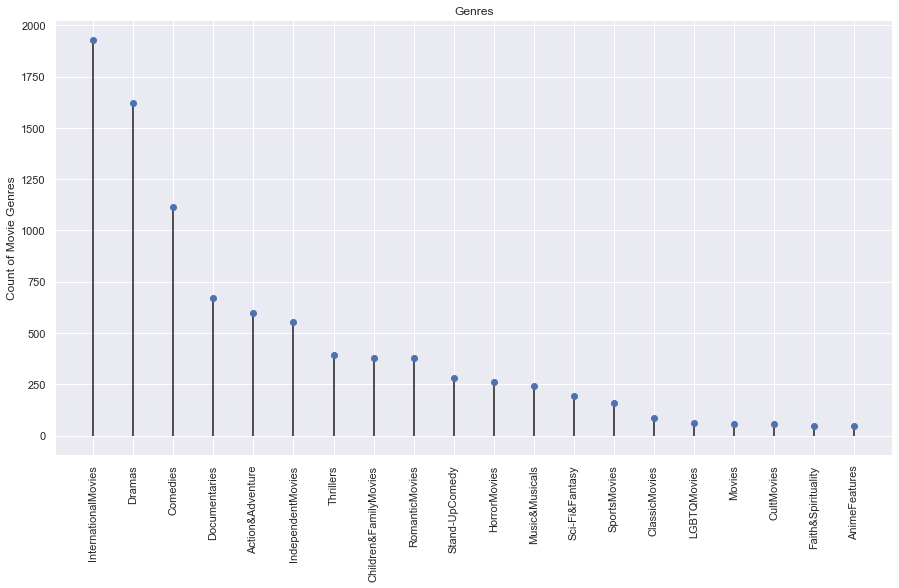

In [63]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse=True)}

fig, ax = plt.subplots(figsize = (15, 8))
x = list(g.keys())
y = list(g.values())
ax.vlines(x, ymin = 0, ymax = y)
ax.plot(x, y, "o")
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of Movie Genres")
ax.set_title("Genres")

In [79]:
genres1 = list(shows['genre'])
gen1 = []

for i in genres1:
    con = list(i.split(','))
    for j in con:
        gen1.append(j.replace(' ', ''))
gen1[:20]

["Kids'TV",
 "Kids'TV",
 'CrimeTVShows',
 'InternationalTVShows',
 'Spanish-LanguageTVShows',
 'Docuseries',
 'Science&NatureTV',
 'InternationalTVShows',
 'RomanticTVShows',
 'TVComedies',
 'Docuseries',
 "Kids'TV",
 'TVComedies',
 'InternationalTVShows',
 'TVDramas',
 'TVThrillers',
 'RomanticTVShows',
 'TVComedies',
 'TVDramas',
 'CrimeTVShows']

In [84]:
g1 = Counter(gen1)
g1

Counter({"Kids'TV": 328,
         'CrimeTVShows': 363,
         'InternationalTVShows': 1001,
         'Spanish-LanguageTVShows': 117,
         'Docuseries': 279,
         'Science&NatureTV': 67,
         'RomanticTVShows': 278,
         'TVComedies': 436,
         'TVDramas': 599,
         'TVThrillers': 44,
         'TVMysteries': 69,
         'BritishTVShows': 210,
         'RealityTV': 153,
         'TVAction&Adventure': 126,
         'TeenTVShows': 44,
         'KoreanTVShows': 132,
         'AnimeSeries': 117,
         'TVHorror': 54,
         'Stand-UpComedy&TalkShows': 42,
         'TVSci-Fi&Fantasy': 68,
         'TVShows': 10,
         'Classic&CultTV': 24})

Text(0.5, 1.0, 'Genres')

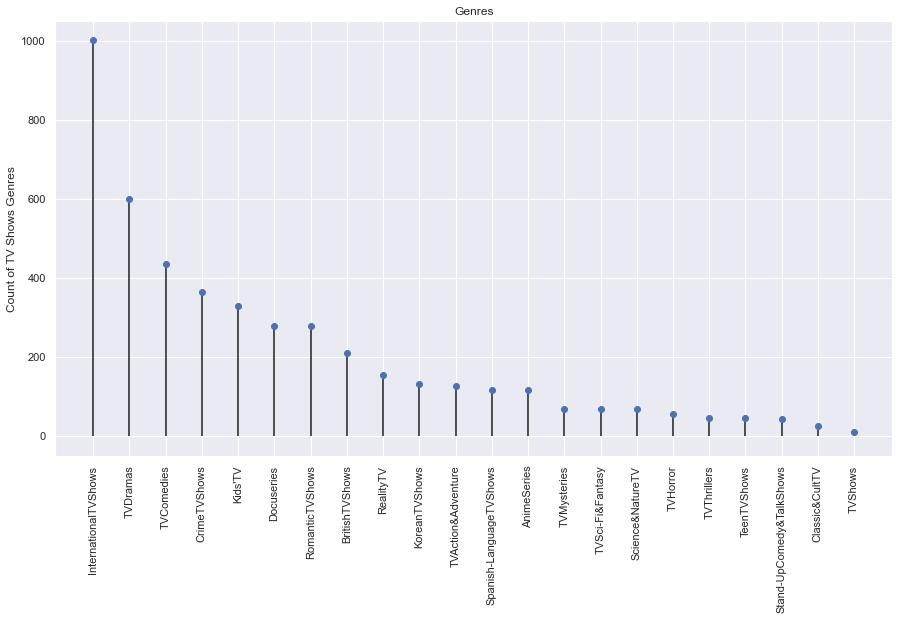

In [85]:
g1 = {k: v for k, v in sorted(g1.items(), key=lambda item: item[1], reverse=True)}

fig, ax = plt.subplots(figsize = (15, 8))
x = list(g1.keys())
y = list(g1.values())
ax.vlines(x, ymin = 0, ymax = y)
ax.plot(x, y, "o")
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of TV Shows Genres")
ax.set_title("Genres")

<a id = 'director'></a>
### <font color = orange> 7. Director
</font>

In [89]:
director = df.dropna()

In [90]:
director['director'].value_counts()

Raúl Campos, Jan Suter    18
Marcus Raboy              14
Jay Karas                 13
Jay Chapman               12
Steven Spielberg           9
                          ..
Gupse Özay                 1
Bert Marcus                1
Ian Nelms, Eshom Nelms     1
Lee Toland Krieger         1
Antongiulio Panizzi        1
Name: director, Length: 3006, dtype: int64

In [95]:
d = list(director['director'])
drctr = []

for i in d:
    con = list(i.split(','))
    for j in con:
        drctr.append(j.replace(' ', ''))

d = Counter(drctr)

d = {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}
iterator = iter(d.items())
for i in range(20):
    print(next(iterator))

('JanSuter', 21)
('RaúlCampos', 19)
('JayKaras', 14)
('MarcusRaboy', 14)
('JayChapman', 12)
('MartinScorsese', 9)
('StevenSpielberg', 9)
('UmeshMehra', 8)
('ShannonHartman', 8)
('LanceBangs', 8)
('DavidDhawan', 8)
('JohnnieTo', 8)
('RyanPolito', 7)
('QuentinTarantino', 7)
('S.S.Rajamouli', 7)
('NoahBaumbach', 7)
('YılmazErdoğan', 7)
('HakanAlgül', 7)
('RobertRodriguez', 7)
('DibakarBanerjee', 7)


In [100]:
plt.figure(figsize = (150,150))
fig = px.treemap(director, path = ['country', 'director'], color = 'director')
fig.show()

<Figure size 10800x10800 with 0 Axes>

<a id = 'actors'></a>
### <font color = orange> 8. Actors
</font>

In [125]:
df['cast'].isnull().sum()

570

In [126]:
actor = df.dropna()

In [127]:
actors = ", ".join(actor['cast'].fillna('')).split(", ")
#print(actors)
top_actors = Counter(actors).most_common(20)
top_actors

['Alan Marriott', 'Andrew Toth', 'Brian Dobson', 'Cole Howard', 'Jennifer Cameron', 'Jonathan Holmes', 'Lee Tockar', 'Lisa Durupt', 'Maya Kay', 'Michael Dobson', 'Nesta Cooper', 'Kate Walsh', 'John Michael Higgins', 'Keith Powers', 'Alicia Sanz', 'Jake Borelli', 'Kid Ink', 'Yousef Erakat', 'Rebekah Graf', 'Anne Winters', 'Peter Gilroy', 'Patrick Davis', 'Antonio Banderas', 'Dylan McDermott', 'Melanie Griffith', 'Birgitte Hjort Sørensen', 'Robert Forster', 'Christa Campbell', 'Tim McInnerny', 'Andy Nyman', 'David Ryall', 'Fabrizio Copano', 'James Franco', 'Kate Hudson', 'Tom Wilkinson', 'Omar Sy', 'Sam Spruell', 'Anna Friel', 'Thomas Arnold', 'Oliver Dimsdale', 'Diana Hardcastle', 'Michael Jibson', 'Diarmaid Murtagh', 'Joaquín Reyes', 'Jim Sturgess', 'Sam Worthington', 'Ryan Kwanten', 'Anthony Hopkins', 'Mark van Eeuwen', 'Thomas Cocquerel', 'Jemima West', 'David Dencik', 'Damandeep Singh Baggan', 'Smita Malhotra', 'Baba Sehgal', 'Deepak Chachra', 'Damandeep Singh Baggan', 'Smita Malhot

[('Anupam Kher', 32),
 ('Shah Rukh Khan', 30),
 ('Naseeruddin Shah', 27),
 ('Om Puri', 27),
 ('Akshay Kumar', 26),
 ('Paresh Rawal', 25),
 ('Amitabh Bachchan', 24),
 ('Boman Irani', 23),
 ('Kareena Kapoor', 19),
 ('Gulshan Grover', 18),
 ('Kay Kay Menon', 18),
 ('Nicolas Cage', 17),
 ('Jackie Shroff', 16),
 ('John Cleese', 16),
 ('Samuel L. Jackson', 15),
 ('Rajpal Yadav', 15),
 ('Asrani', 15),
 ('Ajay Devgn', 15),
 ('Saif Ali Khan', 15),
 ('James Franco', 14)]

In [113]:
actor = [_[0] for _ in top_actors][::-1]#[start:stop:-1]
films = [_[1] for _ in top_actors][::-1]

trace = go.Bar(x = actor, y = films, 
               marker = dict(color = 'rgb(249, 6, 6)',
               line = dict(color='rgb(0, 0, 0)', width=1.5)))
         
layout = go.Layout(template = 'plotly_dark', title = "Top 10 Actors with most Content", 
                   xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
         
fig = go.Figure(data = [trace], layout = layout)
fig.show()

In [122]:
american_movies = movies[movies['country']== 'United States']
american_actors = ", ".join(american_movies['cast'].fillna('')).split(", ")
top_american_actors = Counter(american_actors).most_common(15)
top_american_actors = [_ for _ in top_american_actors if _[0]!= ""]
top_american_actors

[('Laura Bailey', 13),
 ('Adam Sandler', 13),
 ('Samuel L. Jackson', 12),
 ('Fred Tatasciore', 12),
 ('Kate Higgins', 12),
 ('Erin Fitzgerald', 12),
 ('Danny Trejo', 11),
 ('Molly Shannon', 11),
 ('Nicolas Cage', 10),
 ('Keanu Reeves', 10),
 ('Jeff Dunham', 9),
 ('James Franco', 9),
 ('Will Smith', 9),
 ('Morgan Freeman', 9)]

In [123]:
actor = [_[0] for _ in top_american_actors][::-1]
films = [_[1] for _ in top_american_actors][::-1]

trace = go.Bar(x = actor, y = films, 
               marker = dict(color = 'rgb(249, 6, 6)',
               line = dict(color='rgb(0, 0, 0)', width=1.5)))
         
layout = go.Layout(template = 'plotly_dark', title = "Top 10 American Actors with most Movies", 
                   xaxis = dict(title = 'Actors'), yaxis = dict(title = 'Count'))
         
fig = go.Figure(data = [trace], layout = layout)
fig.show()

<a id = 'recom_system'></a>
## <font color = orange> Recommender System
</font>

_Data Preparation_

In [128]:
data = df.copy()

In [141]:
from rake_nltk import Rake

In [135]:
whitespace = []

cols = ['title', 'director', 'cast', 'genre','description']

for i, cols in data.iterrows():
    if type(cols) == str:
        if cols.isspace():
            whitespace.append(i)

            print(whitespace)

data.drop(whitespace, inplace = True)


In [136]:
data.dtypes

show_id                  int64
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
genre                   object
description             object
year_added             float64
dtype: object

In [137]:
data['director'] = data['director'].astype(str)
data['cast'] = data['cast'].astype(str)
data['genre'] = data['genre'].astype(str)

In [142]:
data['desc'] = ''
for index, row in data.iterrows():
    descrip = row['description']
    r = Rake()
    r.extract_keywords_from_text(descrip)
    key_descrip = r.get_word_degrees()
    row['desc'] = list(key_descrip.keys())

In [143]:
data['cast'] = data['cast'].map(lambda x: x.split(','))
data['genre'] = data['genre'].map(lambda x: x.split(','))
data['director'] = data['director'].map(lambda x: x.split(','))

In [144]:
for index, row in data.iterrows():
    row['cast'] = [x.lower().replace(' ','') for x in row['cast']]
    print(row['cast'])
    row['director'] = ''.join(row['director']).lower()
    print(row['director'])

['alanmarriott', 'andrewtoth', 'briandobson', 'colehoward', 'jennifercameron', 'jonathanholmes', 'leetockar', 'lisadurupt', 'mayakay', 'michaeldobson']
richard finn tim maltby
['jandinoasporaat']
nan
['petercullen', 'sumaleemontano', 'frankwelker', 'jeffreycombs', 'kevinmichaelrichardson', 'taniagunadi', 'joshkeaton', 'steveblum', 'andypessoa', 'erniehudson', 'darannorris', 'willfriedle']
nan
['willfriedle', 'darrencriss', 'constancezimmer', 'kharypayton', 'mitchellwhitfield', 'stuartallan', 'tedmcginley', 'petercullen']
nan
['nestacooper', 'katewalsh', 'johnmichaelhiggins', 'keithpowers', 'aliciasanz', 'jakeborelli', 'kidink', 'youseferakat', 'rebekahgraf', 'annewinters', 'petergilroy', 'patrickdavis']
fernando lebrija
['albertoammann', 'eloyazorín', 'verónicaechegui', 'lucíajiménez', 'claudiatraisac']
nan
['antoniobanderas', 'dylanmcdermott', 'melaniegriffith', 'birgittehjortsørensen', 'robertforster', 'christacampbell', 'timmcinnerny', 'andynyman', 'davidryall']
gabe ibáñez
['fabriz

In [146]:
data['combined'] = data['director'].astype(str) + ' ' + data['cast'].astype(str) + ' ' + data['genre'].astype(str) + ' ' + data['description'].astype(str)


In [147]:
data.set_index('title', inplace = True)
data.head()


show_id     type  \
title                                                        
Norm of the North: King Sized Adventure  81145628    Movie   
Jandino: Whatever it Takes               80117401    Movie   
Transformers Prime                       70234439  TV Show   
Transformers: Robots in Disguise         80058654  TV Show   
#realityhigh                             80125979    Movie   

                                                            director  \
title                                                                  
Norm of the North: King Sized Adventure  [Richard Finn,  Tim Maltby]   
Jandino: Whatever it Takes                                     [nan]   
Transformers Prime                                             [nan]   
Transformers: Robots in Disguise                               [nan]   
#realityhigh                                      [Fernando Lebrija]   

                                                                                      cast  \
title                                                                                        
Norm of the North: King Sized Adventure  [Alan Marriott,  Andrew Toth,  Brian Dobson,  ...   
Jandino: Whatever it Takes                                              [Jandino Asporaat]   
Transformers Prime                       [Peter Cullen,  Sumalee Montano,  Frank Welker...   
Transformers: Robots in Disguise         [Will Friedle,  Darren Criss,  Constance Zimme...   
#realityhigh                             [Nesta Cooper,  Kate Walsh,  John Michael Higg...   

                                                                          country  \
title                                                                               
Norm of the North: King Sized Adventure  United States, India, South Korea, China   
Jandino: Whatever it Takes                                         United Kingdom   
Transformers Prime                                                  United States   
Transformers: Robots in Disguise                                    United States   
#realityhigh                                                        United States   

                                        date_added  release_year    rating  \
title                                                                        
Norm of the North: King Sized Adventure 2019-09-09          2019     TV-PG   
Jandino: Whatever it Takes              2016-09-09          2016     TV-MA   
Transformers Prime                      2018-09-08          2013  TV-Y7-FV   
Transformers: Robots in Disguise        2018-09-08          2016     TV-Y7   
#realityhigh                            2017-09-08          2017     TV-14   

                                         duration  \
title                                               
Norm of the North: King Sized Adventure    90 min   
Jandino: Whatever it Takes                 94 min   
Transformers Prime                       1 Season   
Transformers: Robots in Disguise         1 Season   
#realityhigh                               99 min   

                                                                         genre  \
title                                                                            
Norm of the North: King Sized Adventure  [Children & Family Movies,  Comedies]   
Jandino: Whatever it Takes                                   [Stand-Up Comedy]   
Transformers Prime                                                  [Kids' TV]   
Transformers: Robots in Disguise                                    [Kids' TV]   
#realityhigh                                                        [Comedies]   

                                                                               description  \
title                                                                                        
Norm of the North: King Sized Adventure  Before planning an awesome wedding for his gra...   
Jandino: Whatever it Takes               Jandino Asporaat riffs on the 

In [149]:
from sklearn.feature_extraction.text import CountVectorizer
count = CountVectorizer()
count_matrix = count.fit_transform(data['combined'])

In [150]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(count_matrix, count_matrix)
cosine_sim

array([[1.        , 0.0211952 , 0.03407496, ..., 0.07284644, 0.08793609,
        0.05886881],
       [0.0211952 , 1.        , 0.3062236 , ..., 0.13638618, 0.25683475,
        0.24247669],
       [0.03407496, 0.3062236 , 1.        , ..., 0.10963225, 0.25409633,
        0.28350796],
       ...,
       [0.07284644, 0.13638618, 0.10963225, ..., 1.        , 0.04526787,
        0.12626907],
       [0.08793609, 0.25683475, 0.25409633, ..., 0.04526787, 1.        ,
        0.32923769],
       [0.05886881, 0.24247669, 0.28350796, ..., 0.12626907, 0.32923769,
        1.        ]])

In [151]:
indicates = pd.Series(data.index)
indicates[:5]

0    Norm of the North: King Sized Adventure
1                 Jandino: Whatever it Takes
2                         Transformers Prime
3           Transformers: Robots in Disguise
4                               #realityhigh
Name: title, dtype: object

_Recommender Function_

In [166]:
def recommendation (Title, cosine_sim = cosine_sim):
    recommendation_title = []
    #Calling title for the matching
    title = indicates[indicates == Title].index[0]
    #Matching title and the combine values of cosine similarity
    match = pd.Series(cosine_sim[title]).sort_values(ascending = False)
    #Select only 10 best matching for the choosing film
    top_10_film = list(match.iloc[1:16].index)
    for i in top_10_film:
        recommendation_title.append(list(data.index)[i])
    return recommendation_title

In [167]:
recommendation('Black Panther')

['Dragonheart: Battle for the Heartfire',
 'Star Trek',
 'Forks Over Knives',
 'Bobby Kennedy for President',
 'Solo: A Star Wars Story',
 'Solo: A Star Wars Story (Spanish Version)',
 'Golden Time',
 'Sex, Explained',
 'Inuyasha the Movie - La spada del dominatore del mondo',
 'The Imaginarium of Doctor Parnassus',
 "Secrets of Henry VIII's Palace: Hampton Court",
 'Dragons: Race to the Edge',
 'The Lord of the Rings: The Two Towers',
 'Clash of the Titans',
 'Hellboy']

In [168]:
recommendation('Transformers Prime')

['Bobby Kennedy for President',
 'Prohibition: A Film by Ken Burns and Lynn Novick',
 'Danger Mouse',
 'Pororo - The Little Penguin',
 'Woodstock',
 'Virunga: Gorillas in Peril',
 'Frozen Planet: The Epic Journey',
 'DreamWorks Spooky Stories: Volume 2',
 'Sad Hill Unearthed',
 'YOM',
 'Sex, Explained',
 'Anjaan: Special Crimes Unit',
 'Intelligence',
 "What's New Scooby-Doo?",
 "Earth's Natural Wonders: Life at the Extremes"]

In [169]:
recommendation('Transformers: Robots in Disguise')

['Paap-O-Meter',
 'Transformers Prime',
 'Miniforce X',
 "Masha's Spooky Stories",
 'Battlefield Recovery',
 'Behind Enemy Lines',
 'Zig & Sharko',
 'A Year In Space',
 'Power Rangers Ninja Steel',
 'ChuChu TV Kids Songs, Learning Videos & Bedtime Stories',
 'The Alcàsser Murders',
 'Mini Wolf',
 'Polar',
 'A Boy Name Flora A',
 'Dragons: Race to the Edge']

In [163]:
recommendation('Norm of the North: King Sized Adventure')

['Norm of the North: Keys to the Kingdom',
 'Zoom',
 'Stuart Little',
 'Jagga Jasoos',
 'F.R.E.D.I.',
 'Monkey Up',
 "Bob's Broken Sleigh",
 'Santa Girl',
 'Rock My Heart',
 'Khoobsurat']

In [156]:
recommendation('Krish Trish and Baltiboy')

['Krish Trish and Baltiboy: Best Friends Forever',
 'Krish Trish and Baltiboy: Oversmartness Never Pays',
 'Krish Trish and Baltiboy: Part II',
 'Krish Trish and Baltiboy: Battle of Wits',
 'Krish Trish and Baltiboy: The Greatest Trick',
 'Elles ont toutes une histoire',
 'I Dream Of Dance',
 'The Sunshine Makers',
 'Food on the Go',
 'Sex, Explained']

In [157]:
recommendation('Ben 10')

['The Last Kids on Earth',
 'Motown Magic',
 'Pororo - The Little Penguin',
 "Marvel's Iron Fist",
 "Oscar's Oasis",
 '忍者ハットリくん',
 'Morphle',
 'Inspector Gadget',
 'Hoff the Record',
 'Mighty Little Bheem: Diwali']

<a id = 'confidence'></a>
## <font color = orange> Confidence and Association Rule Mining
</font>

In [160]:
data1 = df.copy()

In [158]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

class ContentAnalysis():
    def __init__(self, data_frame, threshold = 0.1, stop_words = 'english', lowercase = True, use_idf = True, norm=u'l2', smooth_idf = True):
        self.data_frame = data_frame
        self.model = TfidfVectorizer(max_df=threshold,stop_words=stop_words, lowercase=lowercase, use_idf=use_idf,norm=norm,smooth_idf=smooth_idf)
        self.vector = False

    def generate_vector(self, data):
        self.vector = self.model.fit_transform(data)
    

    def find_movies(self, request, top = 10):
        if self.vector is not False:
            content_transformation = self.model.transform([request])
            movie_relatively = np.array(np.dot(content_transformation,np.transpose(self.vector)).toarray()[0])
            index = np.argsort(movie_relatively)[-top:][::-1]
            rate = [movie_relatively[i] for i in index]
            result = zip(index, rate)     
            self.render_result(request, result)
            

    def recommend_movie(self, request_index , top = 15):
        if self.vector is not False:
            cosine_similarity = linear_kernel(self.vector[request_index:request_index+1], self.vector).flatten()
            index = cosine_similarity.argsort()[-top-1:-1][::-1]
            rate = [cosine_similarity[i] for i in index]
            result = zip(index, rate)     
            self.render_result(str(self.data_frame[request_index:request_index+1]), result)

    def render_result(self, request_content,indices):
        print('Your request : ' + request_content)
        print('----------------------------------')
        print('Best Results :')
        data = self.data_frame
        for index, rate in indices:
            print('Confidence: {:.2f}%, {}'.format(rate*100, data['title'].loc[index] ))

In [161]:
vector = ContentAnalysis(data1)
vector.generate_vector(data1["description"])
vector.recommend_movie(100)

Your request :       show_id   type     title    director  \
100  81132443  Movie  Deliha 2  Gupse Özay   

                                                  cast country date_added  \
100  Gupse Özay, Eda Ece, Aksel Bonfil, Derya Alabo...  Turkey 2019-09-27   

     release_year rating duration                           genre  \
100          2018  TV-PG  102 min  Comedies, International Movies   

                                           description  year_added  
100  While chasing her dream of becoming a chef, Ze...      2019.0  
----------------------------------
Best Results :
Confidence: 21.07%, The Chefs' Line
Confidence: 18.27%, Bountiful Blessings
Confidence: 14.75%, Young & Hungry
Confidence: 13.10%, Bombairiya
Confidence: 12.54%, The Chef Show
Confidence: 12.12%, Kopitiam
Confidence: 12.09%, A Trip to Jamaica
Confidence: 11.58%, Theater of Life
Confidence: 11.28%, Tunnel
Confidence: 11.26%, P. King Duckling
Confidence: 11.13%, Shopkins: World Vacation
Confidence: 10.49%, Ma

In [162]:
vector.recommend_movie(10)

Your request :      show_id   type                        title               director  \
10  80169755  Movie  Joaquín Reyes: Una y no más  José Miguel Contreras   

             cast                               country date_added  \
10  Joaquín Reyes  United States, India, United Kingdom 2017-09-08   

    release_year rating duration            genre  \
10          2017  TV-MA   78 min  Stand-Up Comedy   

                                          description  year_added  
10  Comedian and celebrity impersonator Joaquín Re...      2017.0  
----------------------------------
Best Results :
Confidence: 12.15%, John Mulaney: New in Town
Confidence: 11.72%, Queens of Comedy
Confidence: 11.51%, Ron White: If You Quit Listening, I'll Shut Up
Confidence: 11.07%, Queen
Confidence: 10.95%, Atypical
Confidence: 10.37%, El Chapo
Confidence: 9.41%, Inst@famous
Confidence: 9.38%, Hot Rod
Confidence: 9.36%, Norm Macdonald Has a Show
Confidence: 9.33%, Jefe
Confidence: 9.27%, Park Na-rae: Glamour

In [165]:
vector.recommend_movie(0)

Your request :     show_id   type                                    title  \
0  81145628  Movie  Norm of the North: King Sized Adventure   

                   director  \
0  Richard Finn, Tim Maltby   

                                                cast  \
0  Alan Marriott, Andrew Toth, Brian Dobson, Cole...   

                                    country date_added  release_year rating  \
0  United States, India, South Korea, China 2019-09-09          2019  TV-PG   

  duration                               genre  \
0   90 min  Children & Family Movies, Comedies   

                                         description  year_added  
0  Before planning an awesome wedding for his gra...      2019.0  
----------------------------------
Best Results :
Confidence: 19.12%, Norm of the North: Keys to the Kingdom
Confidence: 16.68%, Ottaal
Confidence: 13.85%, We Bare Bears
Confidence: 13.62%, Pororo - The Little Penguin
Confidence: 13.47%, Man vs Wild with Sunny Leone
Confidence: 12.74%, T